In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
# loading excel sheets, combining all sheets for two excel files
forest_file = "Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = "Bird_Monitoring_Data_GRASSLAND.XLSX"
def merge_non_empty_sheets(file_path):
    xls = pd.ExcelFile(file_path)
    dfs = []

    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet)
        if not df.empty:  # Only add non-empty sheets
            df["Source_Sheet"] = sheet  # Add sheet name for reference
            dfs.append(df)

    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# Load and merge non-empty sheets
forest_data = merge_non_empty_sheets(forest_file)
grassland_data = merge_non_empty_sheets(grassland_file)

# Display dataset heads
print("Forest Data:")
print(forest_data.head(5), "\n")
print("Grassland Data:")
print(grassland_data.head(5), "\n")

Forest Data:
  Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  AOU_Code  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...      EATO   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...      WBNU   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...      RBWO   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...      OROR   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...      NOMO   

  PIF_Watchlist_Status Regional_Stewardship_Status Temperature   Humidity  \
0                False          

In [4]:
#data precrocessing and data cleaning
#finding null values
print("Missing values in Forest Data:\n", forest_data.isnull().sum(), "\n")
print("Missing values in Grassland Data:\n", grassland_data.isnull().sum(), "\n")

Missing values in Forest Data:
 Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                            

In [5]:
# Dropping  empty column Sub_Unit_Code if it exists in both datasets
drop_cols_forest = ["Sub_Unit_Code"] if "Sub_Unit_Code" in forest_data.columns else []
drop_cols_grass = ["Sub_Unit_Code"] if "Sub_Unit_Code" in forest_data.columns else []
forest_data.drop(columns=drop_cols_forest, inplace=True, errors="ignore")
grassland_data.drop(columns=drop_cols_grass, inplace=True, errors="ignore")
forest_data.drop(columns=["Site Name"], inplace=True, errors="ignore")


In [6]:
print(forest_data.isnull().sum(), "\n")
print(grassland_data.isnull().sum(), "\n")

Admin_Unit_Code                   0
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt       

In [7]:
# making column names of both excels same
forest_data.rename(columns={"NPSTaxonCode": "TaxonCode"}, inplace=True)
grassland_data.rename(columns={"Previously_Obs": "Previously_Observed"}, inplace=True)


In [8]:
# Convert numeric columns
forest_data["Year"] = pd.to_numeric(forest_data["Year"], errors="coerce")
grassland_data["Year"] = pd.to_numeric(grassland_data["Year"], errors="coerce")

forest_data["Visit"] = pd.to_numeric(forest_data["Visit"], errors="coerce")
grassland_data["Visit"] = pd.to_numeric(grassland_data["Visit"], errors="coerce")


In [9]:
# Function to extract numeric value from string
def extract_distance(value):
    if pd.isna(value):
        return np.nan  # Keeping NaNs for now
    value = str(value).replace(' Meters', '').strip()  # Ensure it's a string and remove ' Meters'
    
    if '<=' in value:  # Handling values like '<=50'
        return float(value.replace('<=', '').strip())
    elif '-' in value:  # Handling ranges like '50 - 100'
        try:
            start, end = map(float, value.split('-'))  # Convert both to float
            return (start + end) / 2  # Return the average
        except ValueError:
            print(f"Skipping invalid value: {value}")  # Debugging
            return np.nan
    else:
        try:
            return float(value)  # If it's already a number
        except ValueError:
            print(f"Skipping invalid value: {value}") 
            return np.nan

# Apply function to Distance column
forest_data['Distance'] = forest_data['Distance'].apply(extract_distance).astype(float)
grassland_data['Distance'] = grassland_data['Distance'].apply(extract_distance).astype(float)

# Check if there are any NaN values before filling them
if forest_data['Distance'].isna().sum() > 0:
    print("NaN values detected in forest_data['Distance'], filling with mean...")
    forest_data['Distance'].fillna(forest_data['Distance'].mean())

if grassland_data['Distance'].isna().sum() > 0:
    print("NaN values detected in grassland_data['Distance'], filling with mean...")
    grassland_data['Distance'].fillna(grassland_data['Distance'].mean())

# Print results for debugging
print(forest_data.head(5))
print(grassland_data.head(5))



NaN values detected in forest_data['Distance'], filling with mean...
NaN values detected in grassland_data['Distance'], filling with mean...
  Admin_Unit_Code Site_Name  Plot_Name Location_Type  Year       Date  \
0            ANTI    ANTI 1  ANTI-0036        Forest  2018 2018-05-22   
1            ANTI    ANTI 1  ANTI-0036        Forest  2018 2018-05-22   
2            ANTI    ANTI 1  ANTI-0036        Forest  2018 2018-05-22   
3            ANTI    ANTI 1  ANTI-0036        Forest  2018 2018-05-22   
4            ANTI    ANTI 1  ANTI-0036        Forest  2018 2018-05-22   

  Start_Time  End_Time          Observer  Visit  ... AOU_Code  \
0   06:19:00  06:29:00  Elizabeth Oswald      1  ...     EATO   
1   06:19:00  06:29:00  Elizabeth Oswald      1  ...     WBNU   
2   06:19:00  06:29:00  Elizabeth Oswald      1  ...     RBWO   
3   06:19:00  06:29:00  Elizabeth Oswald      1  ...     OROR   
4   06:19:00  06:29:00  Elizabeth Oswald      1  ...     NOMO   

  PIF_Watchlist_Status  Regio

In [ ]:
# Function to extract numeric value from string
def extract_interval(value):
    if pd.isna(value):
        return np.nan  # Keeping NaNs for now
    value = str(value).replace(' min', '').strip()  # Ensure it's a string and remove ' Meters'
    
    if '-' in value:  # Handling ranges like '0-2.5'
        try:
            start, end = map(float, value.split('-'))  # Convert both to float
            return (start + end) / 2  # Return the average
        except ValueError:
            print(f"Skipping invalid value: {value}")  # Debugging
            return np.nan
    else:
        try:
            return float(value)  # If it's already a number
        except ValueError:
            print(f"Skipping invalid value: {value}") 
            return np.nan

# Apply function to Interval_Length column
forest_data['Interval_Length'] = forest_data['Interval_Length'].apply(extract_interval).astype(float)
grassland_data['Interval_Length'] = grassland_data['Interval_Length'].apply(extract_interval).astype(float)
# Check if there are any NaN values before filling them and imputing with mean
if forest_data['Interval_Length'].isna().sum() > 0:
    forest_data['Interval_Length'].fillna(forest_data['Interval_Length'].mean())

if grassland_data['Interval_Length'].isna().sum() > 0:
    grassland_data['Interval_Length'].fillna(grassland_data['Interval_Length'].mean())

def encode_wind_speed(value):
    if pd.isna(value):
        return np.nan  # Handle missing values
    
    # Extract numeric values using regex
    match = re.search(r'(\d+)\s*-\s*(\d+)|<\s*(\d+)|(\d+)\s*mph', value)
    
    if match:
        if match.group(1) and match.group(2):  # If it's a range like "1-3 mph"
            return (int(match.group(1)) + int(match.group(2))) / 2  # Take the average
        elif match.group(3):  # If it's "< 1 mph"
            return int(match.group(3))  # Use the single number
        elif match.group(4):  # If it's just a single number like "5 mph"
            return int(match.group(4))  
    return np.nan  # If no match found, return NaN

# Apply this function to the 'Wind' column
forest_data['Wind'] = forest_data['Wind'].apply(encode_wind_speed)
grassland_data['Wind'] = grassland_data['Wind'].apply(encode_wind_speed)

In [ ]:
fill_dict = {"Sex": "Unknown", "AcceptedTSN": "Unknown", "TaxonCode": "Unknown", "ID_Method": "Unknown"}
forest_data.fillna(fill_dict,inplace=True)
grassland_data.fillna(fill_dict,inplace=True)

In [ ]:
# Remove duplicates
forest_data.drop_duplicates(inplace=True)
grassland_data.drop_duplicates(inplace=True)

In [13]:
# Recheck missing values
print("Missing values in Forest Data:\n", forest_data.isnull().sum(), "\n")
print("Missing values in Grassland Data:\n", grassland_data.isnull().sum(), "\n")

Missing values in Forest Data:
 Admin_Unit_Code                 0
Site_Name                       0
Plot_Name                       0
Location_Type                   0
Year                            0
Date                            0
Start_Time                      0
End_Time                        0
Observer                        0
Visit                           0
Interval_Length                 0
ID_Method                       0
Distance                       92
Flyover_Observed                0
Sex                             0
Common_Name                     0
Scientific_Name                 0
AcceptedTSN                     0
TaxonCode                       0
AOU_Code                        0
PIF_Watchlist_Status            0
Regional_Stewardship_Status     0
Temperature                     0
Humidity                        0
Sky                             0
Wind                            0
Disturbance                     0
Initial_Three_Min_Cnt           0
Source_Sheet    

In [ ]:
#merging both dataframes
common_columns = list(set(forest_data.columns) & set(grassland_data.columns))

forest_data = forest_data[common_columns]
grassland_data = grassland_data[common_columns]

# Add an identifier column to distinguish ecosystem type
forest_data["Ecosystem"] = "Forest"
grassland_data["Ecosystem"] = "Grassland"

# Merge both datasets
combined_data = pd.concat([forest_data, grassland_data], ignore_index=True)

# Saving excel and csv for Power BI
combined_data.to_excel("Merged_Bird_Data.xlsx", index=False)
combined_data.to_csv("Merged_Bird_Data.csv", index=False)

In [ ]:
merged_df = pd.read_excel("Merged_Bird_Data.xlsx")
print("Merged DataFrame head:\n", merged_df.head(5), "\n")

Merged DataFrame head:
        ID_Method          Observer Start_Time          Scientific_Name  \
0        Singing  Elizabeth Oswald   06:19:00  Pipilo erythrophthalmus   
1        Calling  Elizabeth Oswald   06:19:00       Sitta carolinensis   
2        Calling  Elizabeth Oswald   06:19:00     Melanerpes carolinus   
3        Singing  Elizabeth Oswald   06:19:00          Icterus spurius   
4  Visualization  Elizabeth Oswald   06:19:00        Mimus polyglottos   

   Temperature  Interval_Length  Wind  Visit Source_Sheet   Humidity  ...  \
0         19.9             1.25   1.0      1         ANTI  79.400002  ...   
1         19.9             1.25   1.0      1         ANTI  79.400002  ...   
2         19.9             3.75   1.0      1         ANTI  79.400002  ...   
3         19.9             3.75   1.0      1         ANTI  79.400002  ...   
4         19.9             3.75   1.0      1         ANTI  79.400002  ...   

   TaxonCode Initial_Three_Min_Cnt Regional_Stewardship_Status  Plot

In [ ]:
# Convert Start_Time and End_Time to time objects
merged_df['Start_Time'] = pd.to_datetime(merged_df['Start_Time'], errors='coerce').dt.time
merged_df['End_Time'] = pd.to_datetime(merged_df['End_Time'], errors='coerce').dt.time


In [43]:
# Extract Month from Date
merged_df['Month'] = merged_df['Date'].dt.month

# Convert Month to Season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

merged_df['Season'] = merged_df['Month'].apply(get_season)


In [44]:
# Define bins based on observation start time
def time_of_day(t):
    if pd.isnull(t):
        return np.nan
    if t < pd.to_datetime("10:00:00").time():
        return 'Morning'
    elif t < pd.to_datetime("15:00:00").time():
        return 'Afternoon'
    else:
        return 'Evening'

merged_df['Time_of_Day'] = merged_df['Start_Time'].apply(time_of_day)


In [ ]:
#EDA
print(merged_df.describe(), "\n")

        Temperature  Interval_Length          Wind         Visit  \
count  15372.000000     15372.000000  15372.000000  15372.000000   
mean      22.493826         3.554027      2.635799      1.690997   
min       11.000000         1.250000      1.000000      1.000000   
25%       19.700001         1.250000      1.000000      1.000000   
50%       22.200001         1.250000      2.000000      2.000000   
75%       25.000000         6.250000      2.000000      2.000000   
max       37.299999         8.750000     10.000000      3.000000   
std        4.193138         2.733362      1.977004      0.698253   

           Humidity      Distance     Year                           Date  
count  15372.000000  14683.000000  15372.0                          15372  
mean      74.159335     63.236396   2018.0  2018-06-13 17:45:11.943794176  
min        7.300000     50.000000   2018.0            2018-05-07 00:00:00  
25%       68.000000     50.000000   2018.0            2018-05-24 00:00:00  
50%    

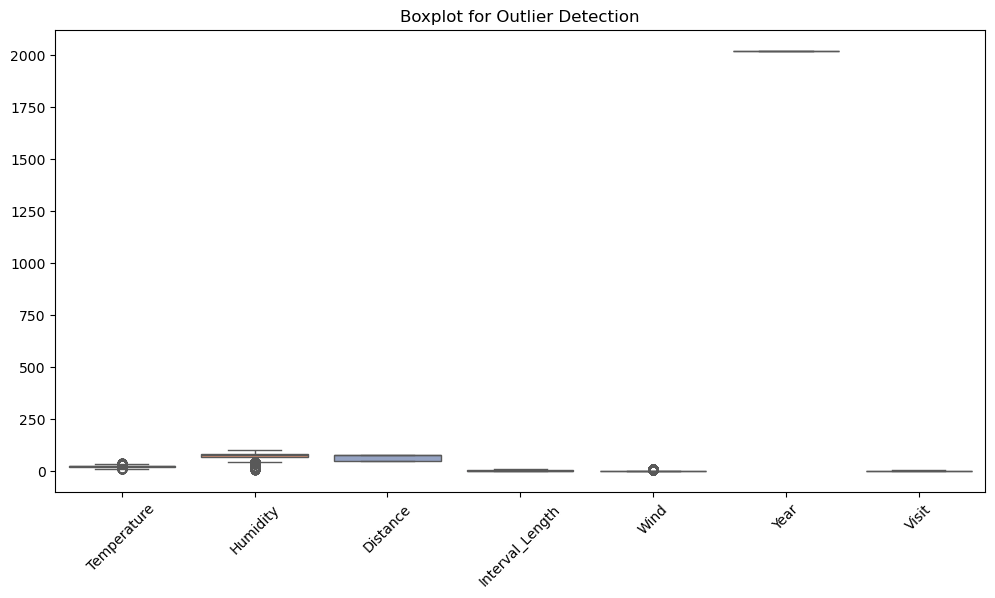

In [ ]:
num_features = ['Temperature', 'Humidity', 'Distance', 'Interval_Length', 'Wind', 'Year', 'Visit']
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[num_features], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


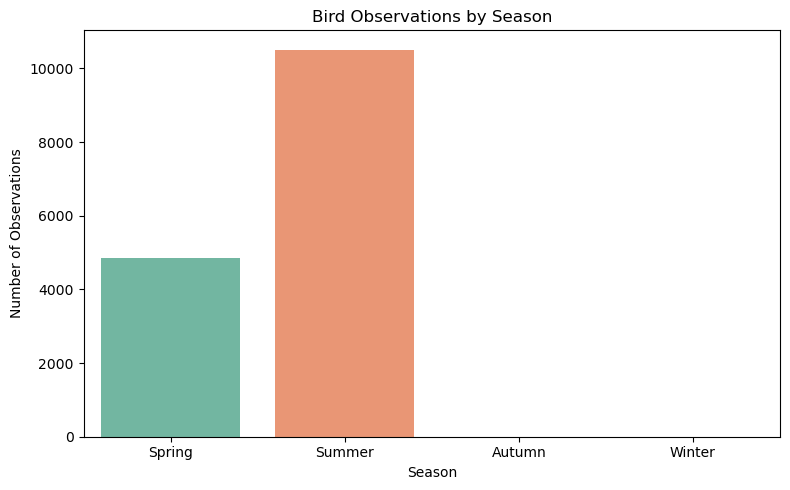

In [48]:
#TEMPORAL ANALYSIS

#Seasonal Trends in Bird Sightings
import seaborn as sns
import matplotlib.pyplot as plt

# Count of observations per season
season_counts = merged_df['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='Set2',hue=season_counts.index,legend=False)
plt.title('Bird Observations by Season')
plt.ylabel('Number of Observations')
plt.xlabel('Season')
plt.tight_layout()
plt.show()


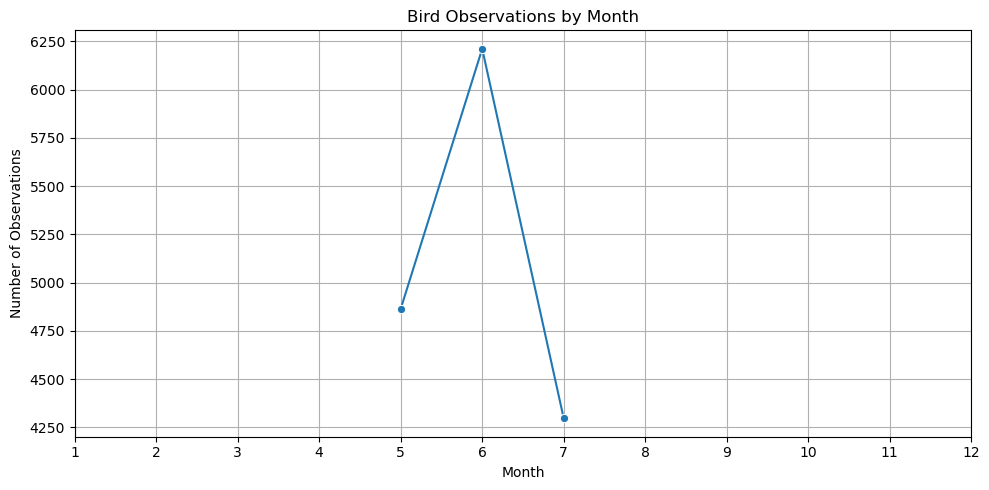

In [50]:
#Monthly Trends
# Group by Month
monthly_counts = merged_df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Bird Observations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


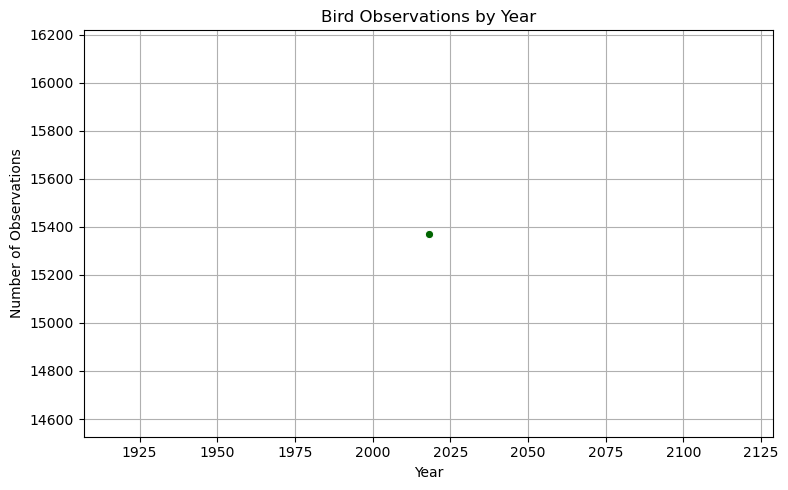

In [52]:
#Yearly Observation Trends
# Group by Year
yearly_counts = merged_df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='darkgreen')
plt.title('Bird Observations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.tight_layout()
plt.show()


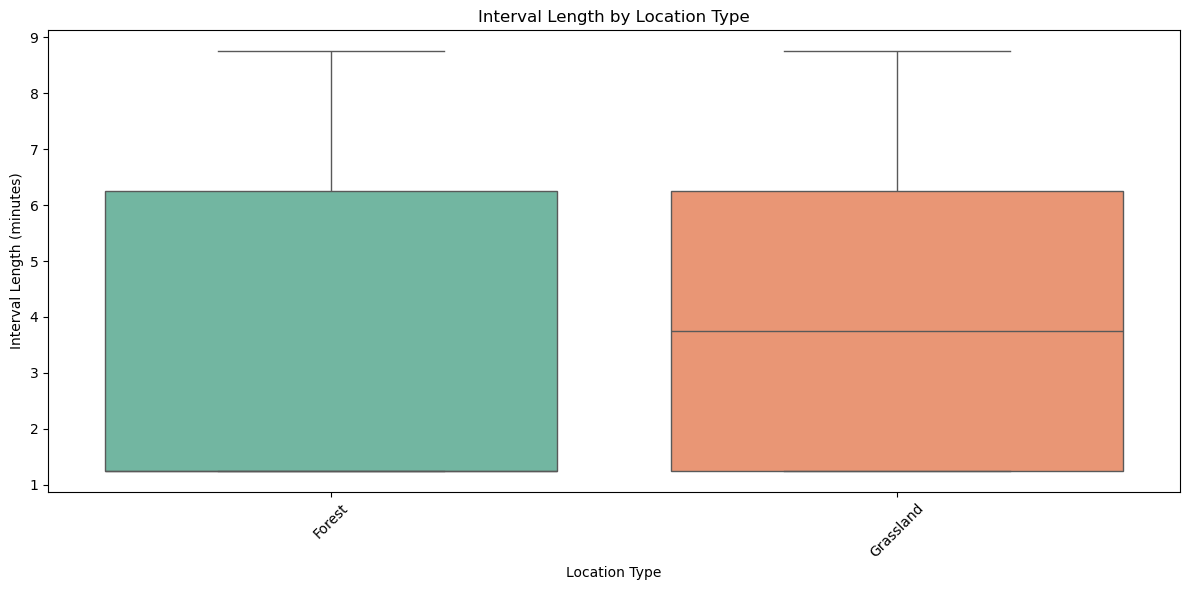

In [58]:
merged_df.groupby('Location_Type')['Interval_Length'].describe()
# Plotting Interval Length by Location Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location_Type', y='Interval_Length', data=merged_df, palette='Set2',hue=merged_df['Location_Type'])
plt.title('Interval Length by Location Type')
plt.ylabel('Interval Length (minutes)')
plt.xlabel('Location Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



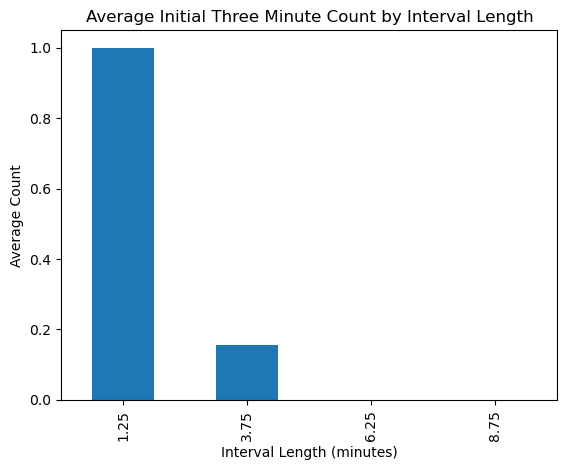

In [ ]:
#Average Initial Three Minute Count by Interval Length
merged_df.groupby('Interval_Length')['Initial_Three_Min_Cnt'].mean().plot(kind='bar')
plt.title('Average Initial Three Minute Count by Interval Length')
plt.xlabel('Interval Length (minutes)') 
plt.ylabel('Average Count')
plt.show()


In [60]:
#SPECIES ANALAYSIS
# Unique species overall
total_species = merged_df['Scientific_Name'].nunique()
print(f"Total unique species observed: {total_species}")

# Unique species by habitat
species_by_habitat = merged_df.groupby('Location_Type')['Scientific_Name'].nunique()
print("\nSpecies count by habitat:\n", species_by_habitat)


Total unique species observed: 127

Species count by habitat:
 Location_Type
Forest       108
Grassland    107
Name: Scientific_Name, dtype: int64


Top 10 most observed bird species:
 Common_Name
Northern Cardinal          1125
Carolina Wren               993
Red-eyed Vireo              738
Eastern Tufted Titmouse     720
Indigo Bunting              611
Eastern Wood-Pewee          574
Field Sparrow               492
Red-bellied Woodpecker      489
American Robin              470
Acadian Flycatcher          462
Name: count, dtype: int64


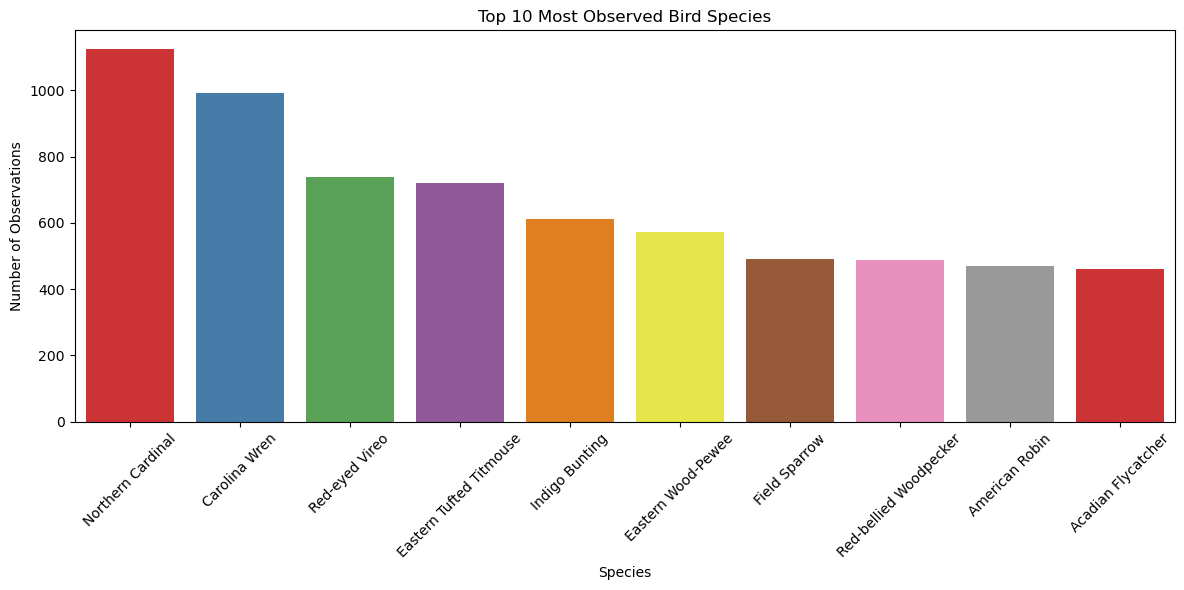

In [62]:
top_species = merged_df['Common_Name'].value_counts().head(10)
print("Top 10 most observed bird species:\n", top_species)
# Plotting the top 10 species
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_species.index, y=top_species.values, palette='Set1',hue=top_species.index,legend=False)
plt.title('Top 10 Most Observed Bird Species')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ID methods distribution:
 ID_Method
Singing          9621
Calling          3941
Visualization    1808
Unknown             2
Name: count, dtype: int64

ID Method usage by habitat:
 ID_Method      Calling  Singing  Unknown  Visualization
Location_Type                                          
Forest            2677     5430        1            438
Grassland         1264     4191        1           1370


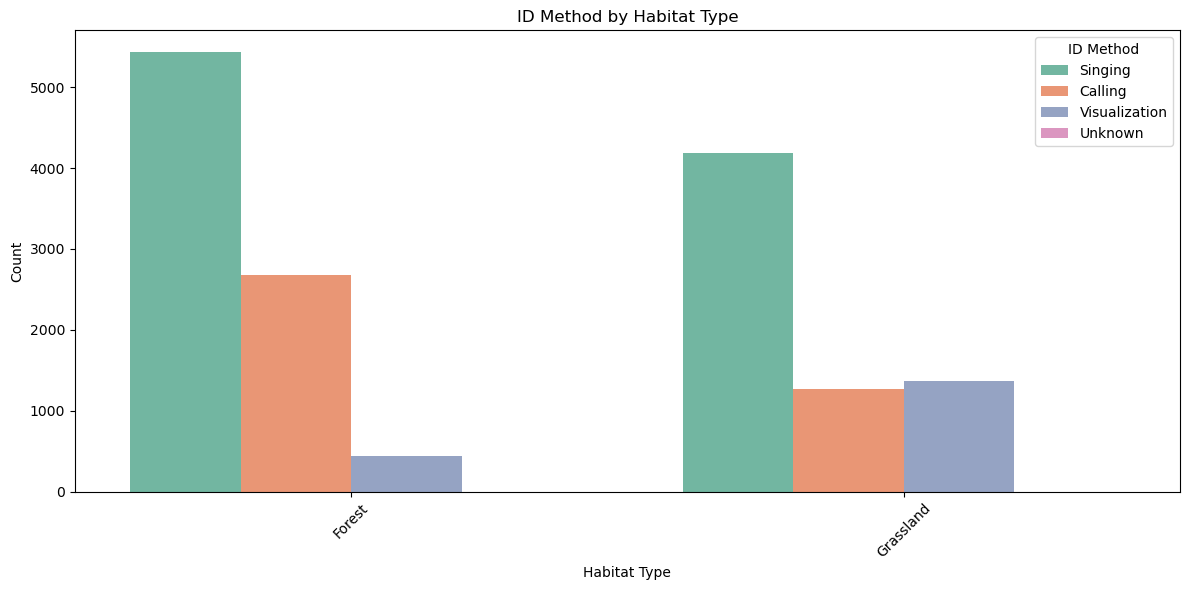

In [65]:
#ANALYZING SPECIES ACTIVITY PATTERN
# Frequency of ID methods used
id_method_counts = merged_df['ID_Method'].value_counts()
print("ID methods distribution:\n", id_method_counts)

# Activity pattern: ID_Method by ecosystem
id_method_by_habitat = merged_df.groupby('Location_Type')['ID_Method'].value_counts().unstack()
print("\nID Method usage by habitat:\n", id_method_by_habitat)
# Plotting ID Method by habitat
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Location_Type', hue='ID_Method', palette='Set2')
plt.title('ID Method by Habitat Type')
plt.xlabel('Habitat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='ID Method')
plt.tight_layout()
plt.show()

In [67]:
#SEX RATIO ANALYSIS
# General sex distribution
sex_dist = merged_df['Sex'].value_counts()
print("Sex distribution:\n", sex_dist)

# Sex distribution by species (optional)
sex_by_species = merged_df.pivot_table(index='Common_Name', columns='Sex', aggfunc='size', fill_value=0)
sex_by_species.head(10)


Sex distribution:
 Sex
Undetermined    6954
Unknown         5183
Male            3109
Female           126
Name: count, dtype: int64


Sex,Female,Male,Undetermined,Unknown
Common_Name,,,,
Acadian Flycatcher,0,0,26,436
American Crow,0,0,137,142
American Goldfinch,18,49,261,129
American Kestrel,0,0,7,0
American Redstart,0,8,20,4
American Robin,2,81,256,131
Bald Eagle,0,0,5,0
Baltimore Oriole,2,8,34,17
Barn Swallow,1,5,124,2


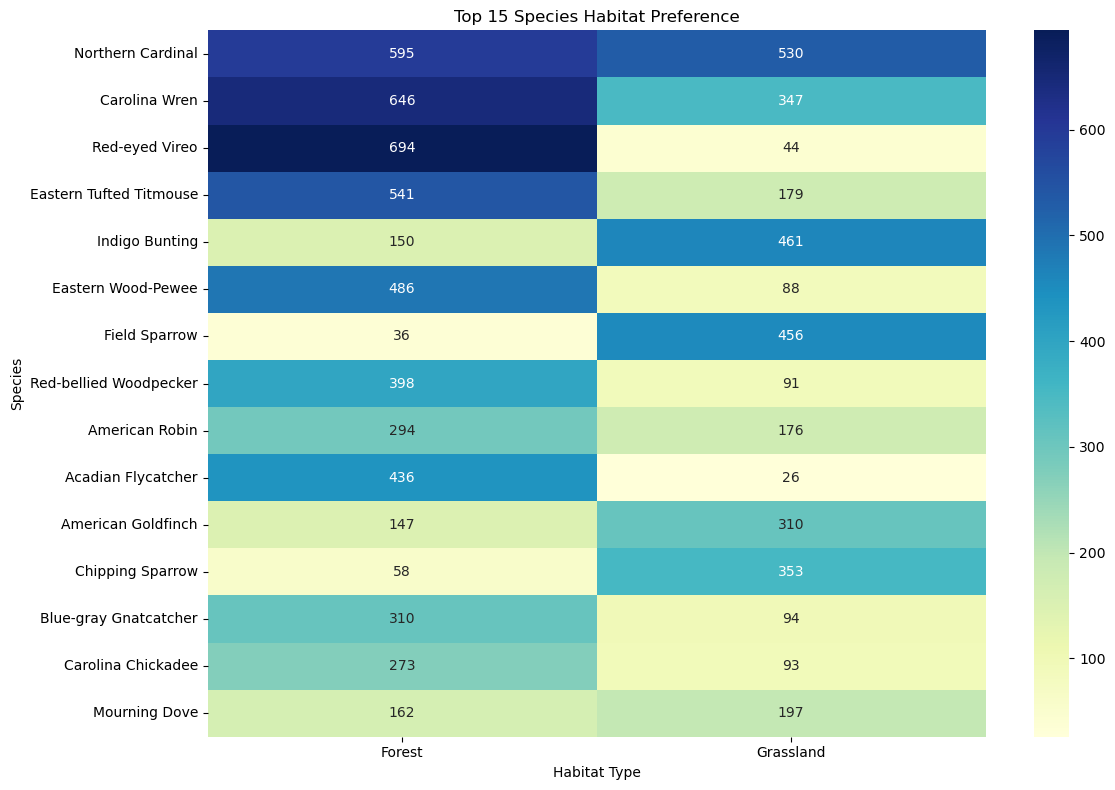

In [68]:
#SPECIES HABITAT HEATMAP
species_habitat = merged_df.pivot_table(index='Common_Name', columns='Location_Type', aggfunc='size', fill_value=0)

# Top species across both habitats
top_species_habitat = species_habitat.loc[species_habitat.sum(axis=1).sort_values(ascending=False).head(15).index]

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(top_species_habitat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 15 Species Habitat Preference')
plt.ylabel('Species')
plt.xlabel('Habitat Type')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

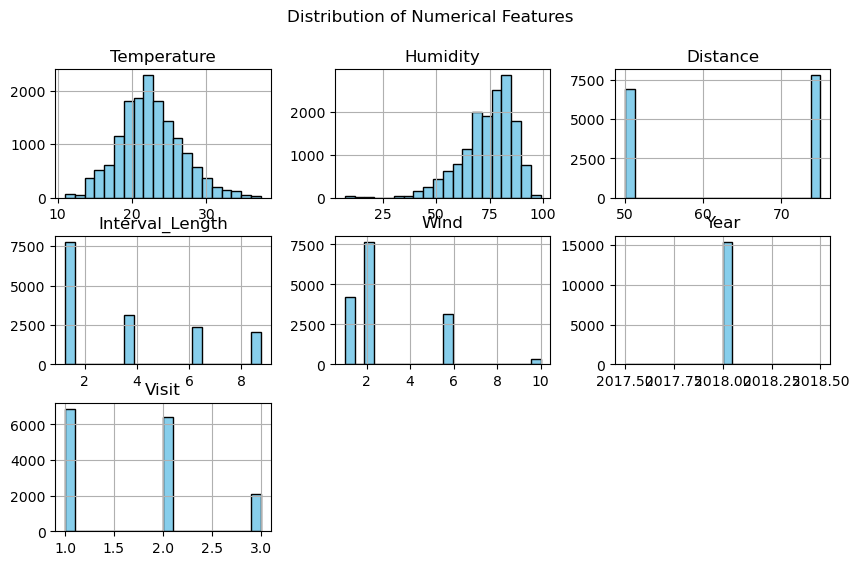

In [ ]:
#Environmental condition analysis
plt.figure(figsize=(12, 8))
combined_data[num_features].hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

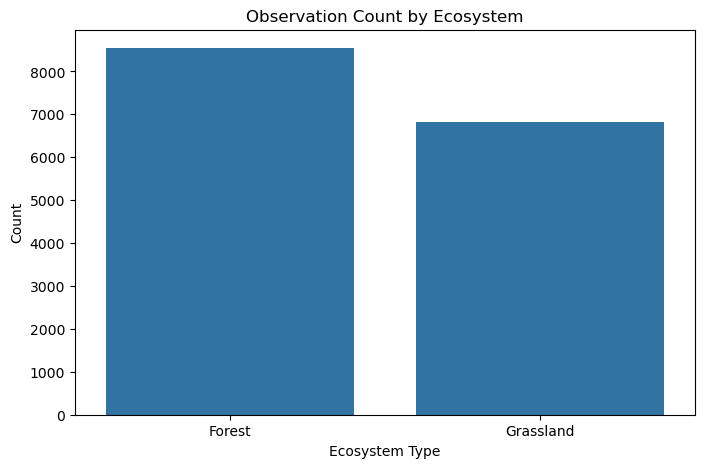

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='Ecosystem')
plt.title("Observation Count by Ecosystem")
plt.xlabel("Ecosystem Type")
plt.ylabel("Count")
plt.show()


In [71]:
# Basic stats
print(merged_df[['Temperature', 'Humidity']].describe())

# Sky and Wind condition counts
print("\nSky conditions:\n", merged_df['Sky'].value_counts())
print("\nWind conditions:\n", merged_df['Wind'].value_counts())


        Temperature      Humidity
count  15372.000000  15372.000000
mean      22.493826     74.159335
std        4.193138     12.168509
min       11.000000      7.300000
25%       19.700001     68.000000
50%       22.200001     76.599998
75%       25.000000     83.400002
max       37.299999     98.800003

Sky conditions:
 Sky
Partly Cloudy          6172
Clear or Few Clouds    5333
Cloudy/Overcast        2917
Fog                     598
Mist/Drizzle            352
Name: count, dtype: int64

Wind conditions:
 Wind
2.0     7636
1.0     4210
5.5     3161
10.0     365
Name: count, dtype: int64


Correlation Matrix:
                        Temperature  Humidity  Initial_Three_Min_Cnt
Temperature               1.000000 -0.337616              -0.022696
Humidity                 -0.337616  1.000000               0.044088
Initial_Three_Min_Cnt    -0.022696  0.044088               1.000000


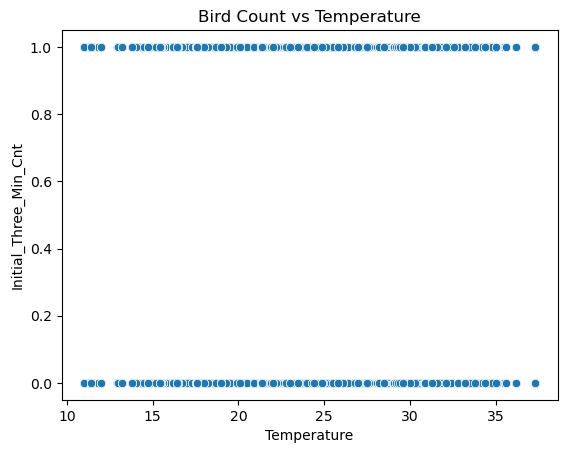

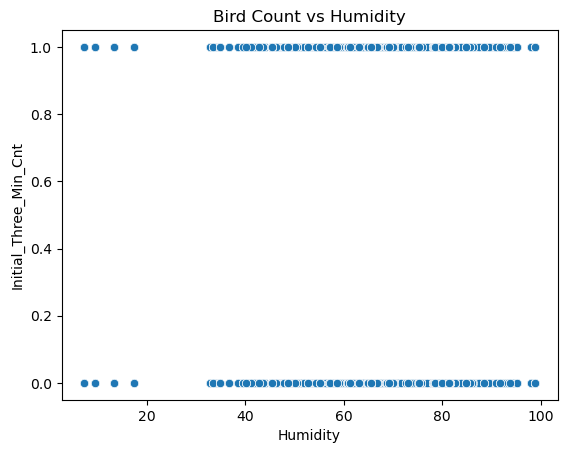

In [72]:
# Correlation check (numerical)
corr = merged_df[['Temperature', 'Humidity', 'Initial_Three_Min_Cnt']].corr()
print("Correlation Matrix:\n", corr)

# Visual scatter plots
sns.scatterplot(data=merged_df, x='Temperature', y='Initial_Three_Min_Cnt')
plt.title("Bird Count vs Temperature")
plt.show()

sns.scatterplot(data=merged_df, x='Humidity', y='Initial_Three_Min_Cnt')
plt.title("Bird Count vs Humidity")
plt.show()


In [73]:
# Average bird count by Sky condition
sky_impact = merged_df.groupby('Sky')['Initial_Three_Min_Cnt'].mean().sort_values(ascending=False)
print("Avg Bird Count by Sky Condition:\n", sky_impact)

# Same for Wind
wind_impact = merged_df.groupby('Wind')['Initial_Three_Min_Cnt'].mean().sort_values(ascending=False)
print("\nAvg Bird Count by Wind Condition:\n", wind_impact)


Avg Bird Count by Sky Condition:
 Sky
Clear or Few Clouds    0.541534
Partly Cloudy          0.541154
Cloudy/Overcast        0.535139
Fog                    0.486622
Mist/Drizzle           0.480114
Name: Initial_Three_Min_Cnt, dtype: float64

Avg Bird Count by Wind Condition:
 Wind
5.5     0.544132
2.0     0.540204
1.0     0.528741
10.0    0.487671
Name: Initial_Three_Min_Cnt, dtype: float64


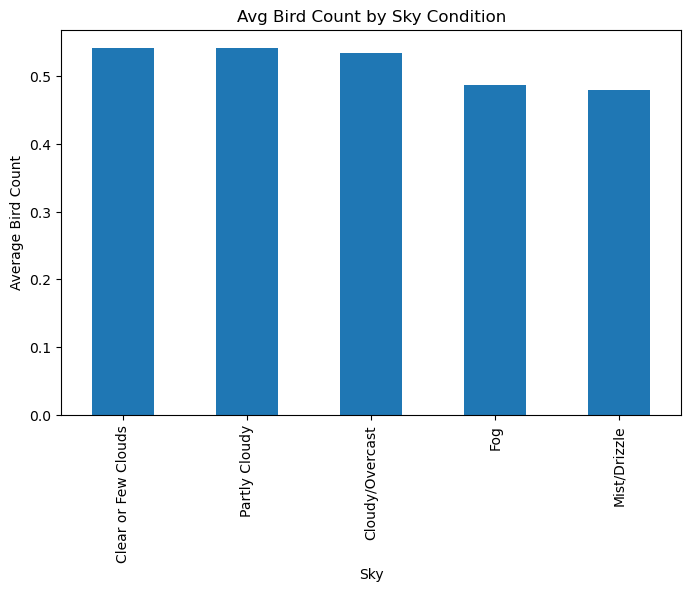

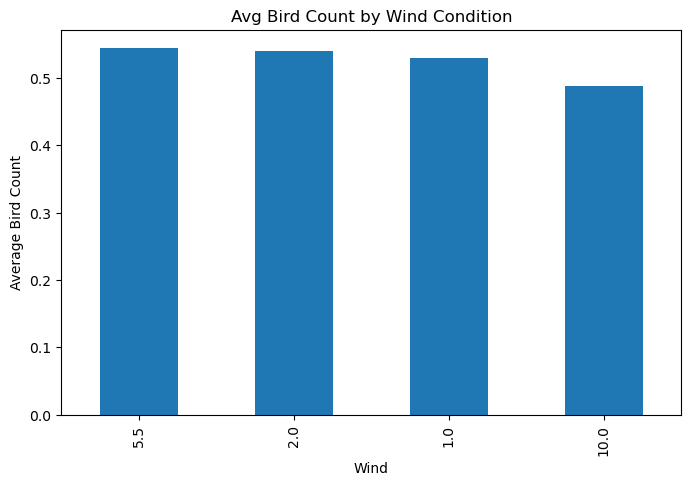

In [74]:
sky_impact.plot(kind='bar', title='Avg Bird Count by Sky Condition', figsize=(8, 5))
plt.ylabel('Average Bird Count')
plt.show()

wind_impact.plot(kind='bar', title='Avg Bird Count by Wind Condition', figsize=(8, 5))
plt.ylabel('Average Bird Count')
plt.show()


Disturbance
No effect on count          7525
Slight effect on count      5840
Moderate effect on count    1577
Serious effect on count      430
Name: count, dtype: int64

Bird Count by Disturbance Level:
 Disturbance
Slight effect on count      0.541952
No effect on count          0.540199
Moderate effect on count    0.510463
Serious effect on count     0.497674
Name: Initial_Three_Min_Cnt, dtype: float64


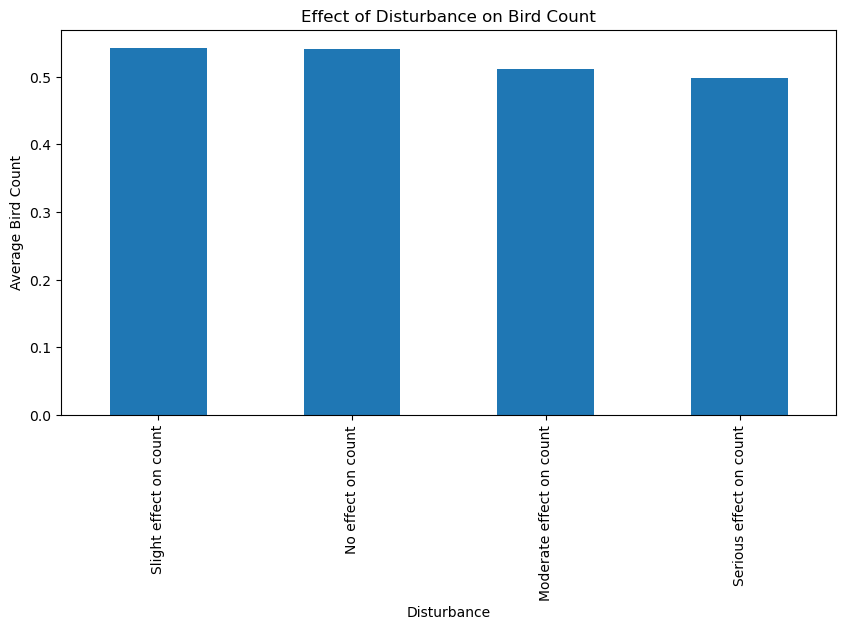

In [75]:
# Count of each disturbance type
print(merged_df['Disturbance'].value_counts())

# Mean bird count by disturbance
disturbance_impact = merged_df.groupby('Disturbance')['Initial_Three_Min_Cnt'].mean().sort_values(ascending=False)
print("\nBird Count by Disturbance Level:\n", disturbance_impact)

# Optional plot
disturbance_impact.plot(kind='bar', title='Effect of Disturbance on Bird Count', figsize=(10, 5))
plt.ylabel("Average Bird Count")
plt.show()


count    14683.000000
mean        63.236396
std         12.478715
min         50.000000
25%         50.000000
50%         75.000000
75%         75.000000
max         75.000000
Name: Distance, dtype: float64


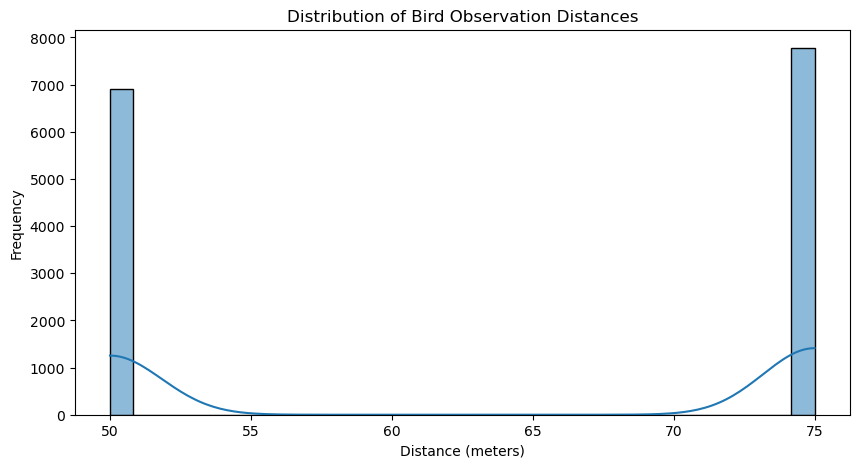

In [77]:
#Distance and Behavior Analysis
# Summary stats
print(merged_df['Distance'].describe())

# Plot distance distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Distance'], bins=30, kde=True)
plt.title('Distribution of Bird Observation Distances')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()


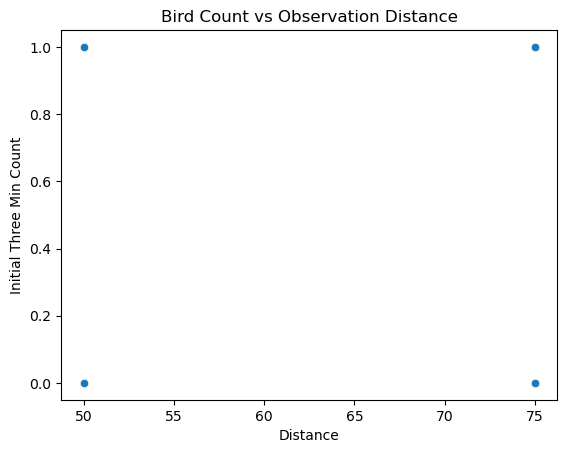

Correlation between Distance and Bird Count:
                        Distance  Initial_Three_Min_Cnt
Distance               1.000000              -0.030697
Initial_Three_Min_Cnt -0.030697               1.000000


In [78]:
# distance vs bird count
# Scatter plot
sns.scatterplot(data=merged_df, x='Distance', y='Initial_Three_Min_Cnt')
plt.title('Bird Count vs Observation Distance')
plt.xlabel('Distance')
plt.ylabel('Initial Three Min Count')
plt.show()

# Correlation
corr = merged_df[['Distance', 'Initial_Three_Min_Cnt']].corr()
print("Correlation between Distance and Bird Count:\n", corr)


Flyover Observed:
 Flyover_Observed
False    14683
True       689
Name: count, dtype: int64


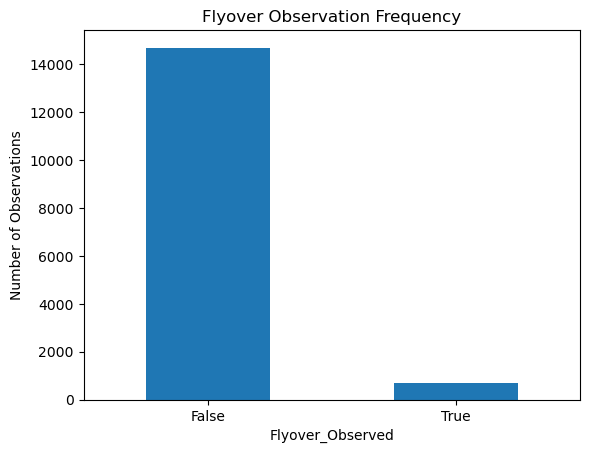

In [79]:
# Count of True vs False
flyover_counts = merged_df['Flyover_Observed'].value_counts()
print("Flyover Observed:\n", flyover_counts)

# Bar plot
flyover_counts.plot(kind='bar', title='Flyover Observation Frequency')
plt.xticks(rotation=0)
plt.ylabel("Number of Observations")
plt.show()


Top 10 Observers:
 Observer
Elizabeth Oswald    5763
Kimberly Serno      5346
Brian Swimelar      4263
Name: count, dtype: int64


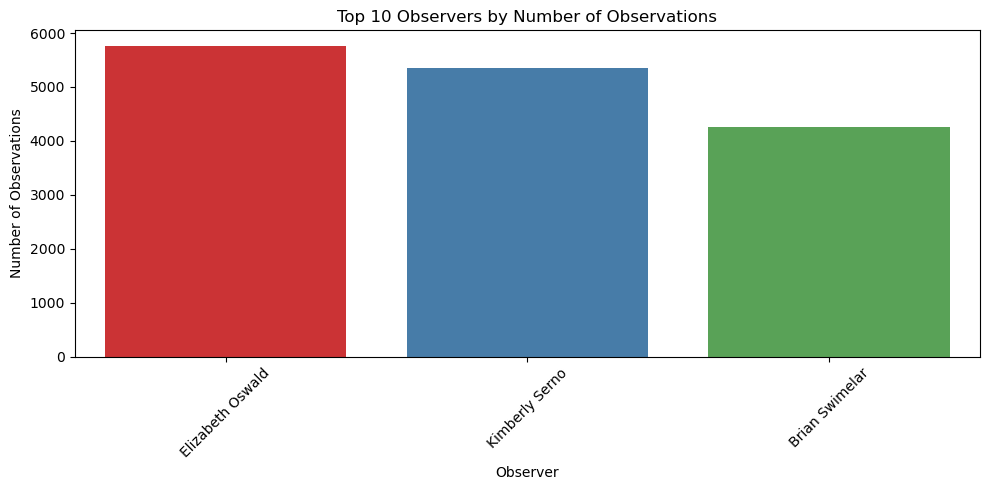

In [81]:
#OBSERVER TRENDS
# Observer frequency
observer_counts = merged_df['Observer'].value_counts()
print("Top 10 Observers:\n", observer_counts.head(10))

# Bar plot of top observers
merged_df.groupby('Observer')['Interval_Length'].mean().sort_values(ascending=False).head()
plt.figure(figsize=(10, 5))
sns.barplot(x=merged_df['Observer'].value_counts().index[:10], y=merged_df['Observer'].value_counts().values[:10], palette='Set1',hue=merged_df['Observer'].value_counts().index[:10],legend=False)       
plt.title('Top 10 Observers by Number of Observations')
plt.xlabel('Observer')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Top Observers by Total Bird Count:
 Observer
Elizabeth Oswald    3320
Kimberly Serno      2880
Brian Swimelar      2049
Name: Initial_Three_Min_Cnt, dtype: int64


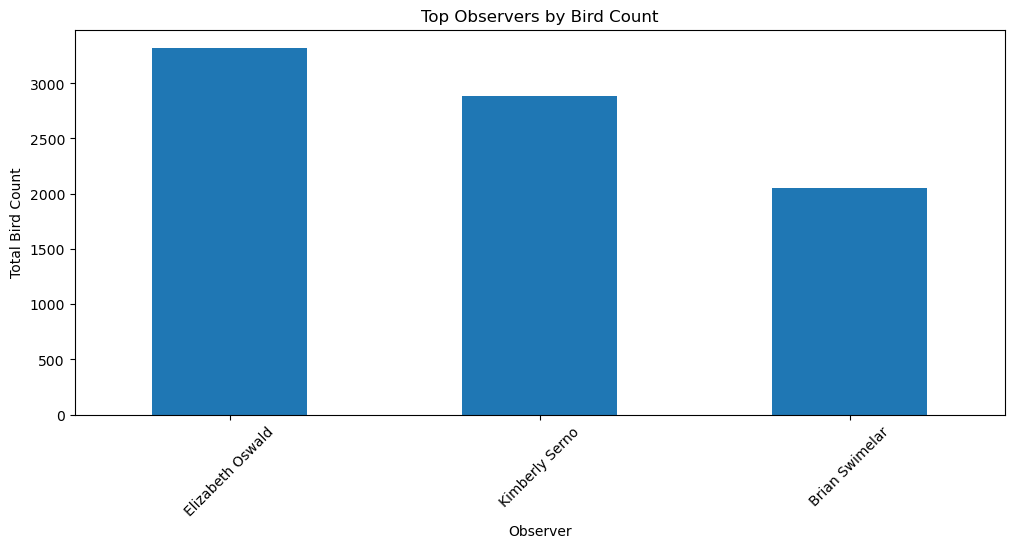

In [ ]:
# Group by observer and get total bird count
observer_bird_counts = merged_df.groupby('Observer')['Initial_Three_Min_Cnt'].sum().sort_values(ascending=False)
print("Top Observers by Total Bird Count:\n", observer_bird_counts.head(10))

# Plot
observer_bird_counts.head(10).plot(kind='bar', figsize=(12,5), title='Top Observers by Bird Count')
plt.ylabel("Total Bird Count")
plt.xlabel("Observer")
plt.xticks(rotation=45)
plt.show()


Top Observers by Species Diversity:
 Observer
Elizabeth Oswald    120
Kimberly Serno       91
Brian Swimelar       84
Name: Scientific_Name, dtype: int64


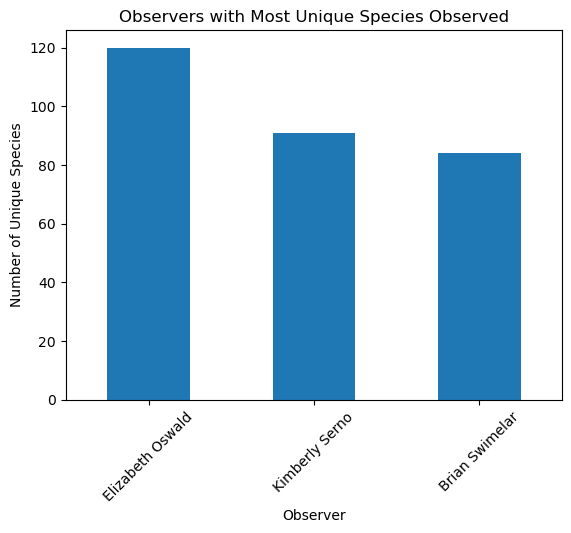

In [84]:
species_per_observer = merged_df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False)
print("Top Observers by Species Diversity:\n", species_per_observer.head(10))

species_per_observer.head(10).plot(kind='bar', title='Observers with Most Unique Species Observed')
plt.ylabel("Number of Unique Species")
plt.xlabel("Observer")
plt.xticks(rotation=45)
plt.show()


PIF Watchlist Status Counts:
 PIF_Watchlist_Status
False    14994
True       378
Name: count, dtype: int64


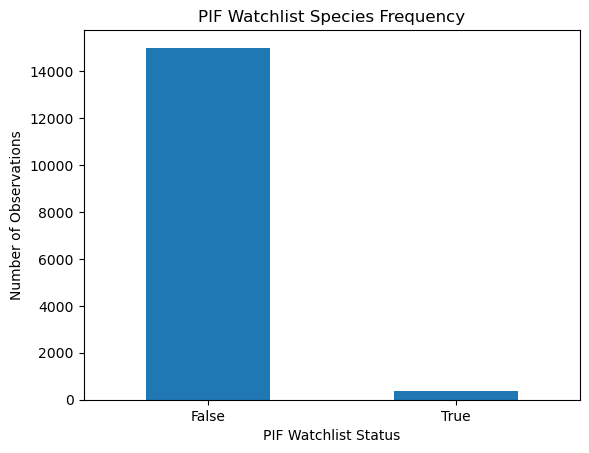

In [86]:
#CONVERSATION INSIGHTS
# Check how many records are flagged as watchlist
watchlist_counts = merged_df['PIF_Watchlist_Status'].value_counts()
print("PIF Watchlist Status Counts:\n", watchlist_counts)

# Plot it
watchlist_counts.plot(kind='bar', title='PIF Watchlist Species Frequency')
plt.ylabel('Number of Observations')
plt.xlabel('PIF Watchlist Status')
plt.xticks(rotation=0)
plt.show()


Regional Stewardship Status Counts:
 Regional_Stewardship_Status
False    11482
True      3890
Name: count, dtype: int64


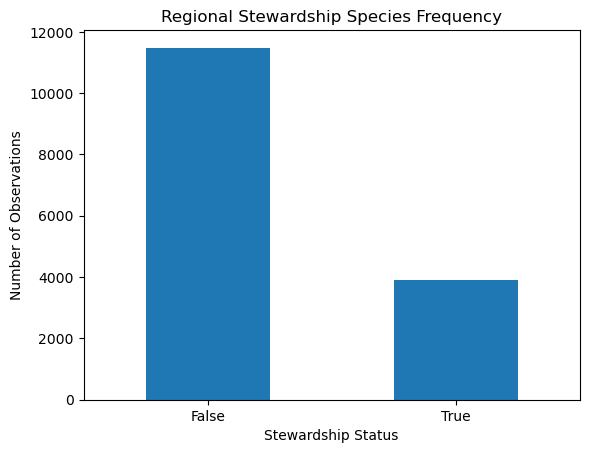

In [87]:
# Check distribution
stewardship_counts = merged_df['Regional_Stewardship_Status'].value_counts()
print("Regional Stewardship Status Counts:\n", stewardship_counts)

# Plot
stewardship_counts.plot(kind='bar', title='Regional Stewardship Species Frequency')
plt.ylabel('Number of Observations')
plt.xlabel('Stewardship Status')
plt.xticks(rotation=0)
plt.show()


In [89]:
# Count of AOU Codes for Watchlist species
aou_watchlist = merged_df[merged_df['PIF_Watchlist_Status'] == True]['AOU_Code'].value_counts()
print("AOU Codes with Most Watchlist Species:\n", aou_watchlist.head(10))


AOU Codes with Most Watchlist Species:
 AOU_Code
WOTH    309
WEWA     31
PRAW     25
CERW      7
KEWA      2
WIFL      2
BWWA      1
RHWO      1
Name: count, dtype: int64


In [90]:
# Map AOU Code to common/scientific names
aou_map = merged_df[['AOU_Code', 'Common_Name', 'Scientific_Name']].drop_duplicates()
print(aou_map.head())


  AOU_Code              Common_Name          Scientific_Name
0     EATO           Eastern Towhee  Pipilo erythrophthalmus
1     WBNU  White-breasted Nuthatch       Sitta carolinensis
2     RBWO   Red-bellied Woodpecker     Melanerpes carolinus
3     OROR           Orchard Oriole          Icterus spurius
4     NOMO     Northern Mockingbird        Mimus polyglottos


PIF Watchlist Species by Ecosystem:
 Location_Type
Forest       338
Grassland     40
Name: count, dtype: int64


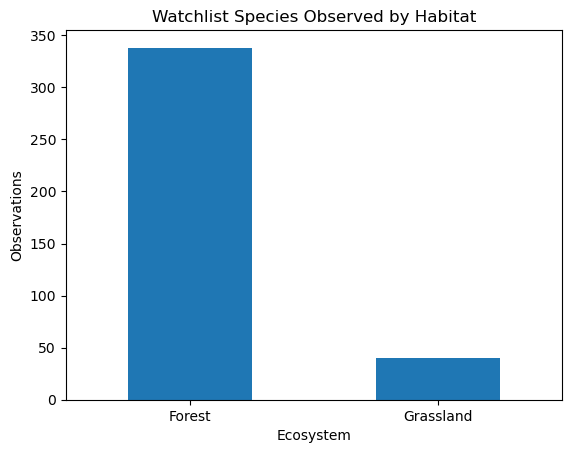

In [91]:
# PIF Watchlist comparison by ecosystem
pif_by_ecosystem = merged_df[merged_df['PIF_Watchlist_Status'] == True]['Location_Type'].value_counts()
print("PIF Watchlist Species by Ecosystem:\n", pif_by_ecosystem)

pif_by_ecosystem.plot(kind='bar', title='Watchlist Species Observed by Habitat')
plt.ylabel('Observations')
plt.xlabel('Ecosystem')
plt.xticks(rotation=0)
plt.show()


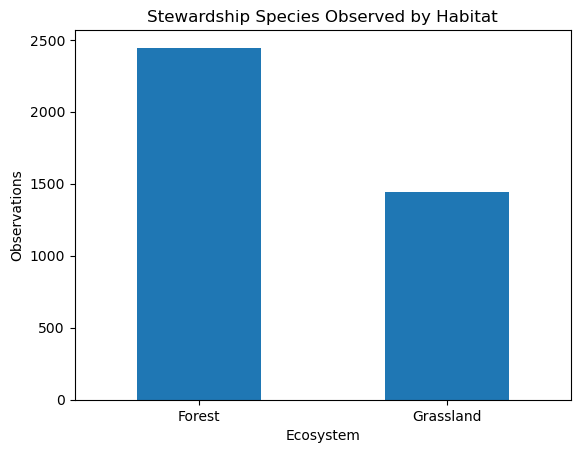

In [93]:
steward_by_ecosystem = merged_df[merged_df['Regional_Stewardship_Status'] == True]['Location_Type'].value_counts()
steward_by_ecosystem.plot(kind='bar', title='Stewardship Species Observed by Habitat')
plt.ylabel('Observations')
plt.xlabel('Ecosystem')
plt.xticks(rotation=0)
plt.show()
